In [7]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

Exercise 2

Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum? Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

In [11]:
wave = thinkdsp.read_wave("jazz-piano-intro.wav")
wave.normalize()
wave.make_audio()

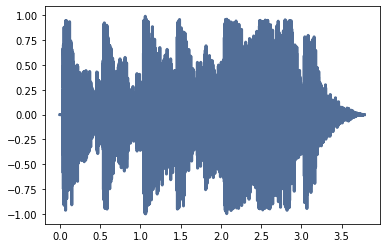

In [12]:
wave.plot()

In [14]:
segment = wave.segment(start=1, duration=1)
segment.make_audio()

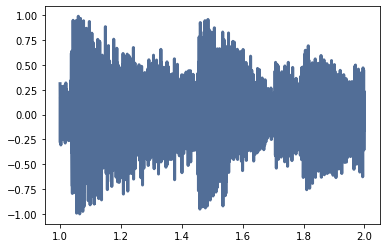

In [15]:
segment.plot()

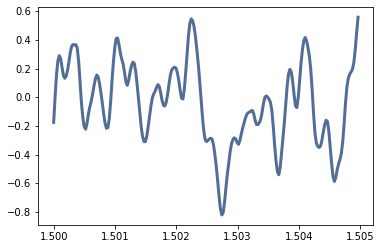

In [16]:
segment.segment(start=0.5, duration=0.005).plot()

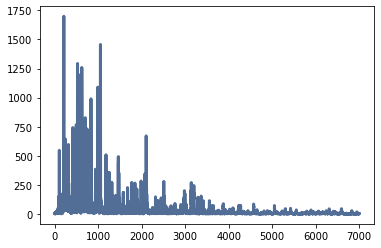

In [17]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

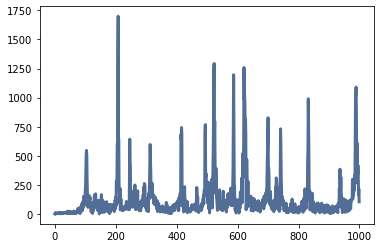

In [18]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [19]:
spectrum.peaks()[:30]

[(1699.4816042786633, 208.0),
 (1456.6720206643977, 1050.0),
 (1364.120056247281, 207.0),
 (1334.1689644155647, 1049.0),
 (1293.1733294068454, 523.0),
 (1258.7710587464273, 621.0),
 (1232.7473742300792, 522.0),
 (1196.6201999605023, 587.0),
 (1090.4221329690831, 989.0),
 (1026.599106842804, 988.0),
 (1022.5768639090352, 623.0),
 (1007.9984287462142, 987.0),
 (989.5486540057698, 832.0),
 (979.9559023138054, 622.0),
 (947.2188607923077, 624.0),
 (890.4238972720141, 1047.0),
 (872.1249515545987, 1042.0),
 (857.8848516321747, 990.0),
 (827.1949683633932, 700.0),
 (816.4040013487484, 626.0),
 (810.207702747752, 521.0),
 (796.9571004161303, 525.0),
 (781.0663882667255, 833.0),
 (776.8784519637453, 586.0),
 (767.6138919175489, 494.0),
 (742.4365686401013, 416.0),
 (731.3600137868012, 741.0),
 (698.7877786271434, 417.0),
 (681.9042979750349, 414.0),
 (677.4155176715994, 627.0)]

In [20]:
spectrum.low_pass(1500)

In [21]:
spectrum.make_wave().make_audio()

In [22]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=4750, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=4750, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [23]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.5), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

Exercise 3

Synthesize a compound signal by creating SinSignal and CosSignal objects and adding them up. Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it. What happens if you add frequency components that are not multiples of the fundamental?

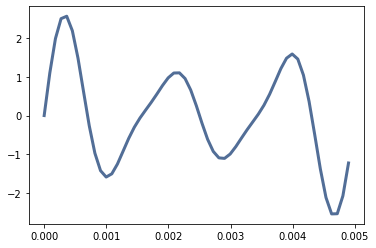

In [24]:
signal = (thinkdsp.SinSignal(freq=600, amp=1.5) +
          thinkdsp.SinSignal(freq=800, amp=0.75) +
          thinkdsp.SinSignal(freq=1000, amp=0.5))
signal.plot()

In [25]:
wave2 = signal.make_wave(duration=1.5)
wave2.apodize()

In [26]:
wave2.make_audio()

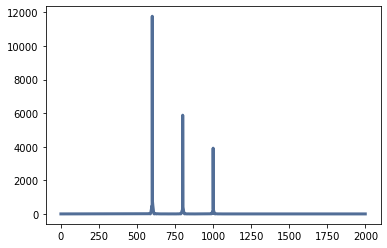

In [27]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

In [28]:
signal += thinkdsp.SinSignal(freq=550)
signal.make_wave().make_audio()

Exercise 4

Write a function called stretch that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying ts and framerate. Hint: it should only take two lines of code.

In [38]:
wave3 = thinkdsp.read_wave('jazz-piano-intro.wav')
wave3.normalize()
wave3.make_audio()

In [30]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [39]:
stretch(wave3, 0.8)
wave3.make_audio()

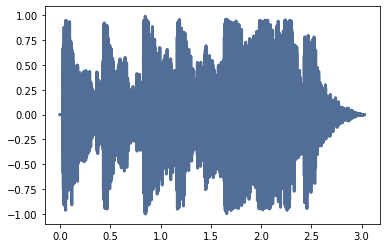

In [40]:
wave3.plot()